## Классификация при помощи CNN.
На занятии по классификации временных рядов мы разобрали подход, основанный на мере расстояния DTW. Другое семейство алгоритмов основано на вычислении признаков по скользящему окну, например, автоматическая генерация признаков при помощи CNN. В задании вам предлагается разработать baseline решение для классификации рядов из датасета human activity recognition (https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) при помощи CNN сети. В качестве базовой архитектуры будем использовать наработки с семинара по предсказанию при помощи CNN, где в последнем слое используется softmax в качестве функции активации.

In [1]:
from typing import Tuple

In [2]:
import numpy as np
import pandas as pd
import keras
from tensorflow.keras.utils import to_categorical

### 1. Считаем данные  
- Фичи сразу решейпнем, добавив размерность для свёрточного слоя  
- Лейблы принимают значения от 1 до 6. Для корректного расчёта моделью мы отнимем от ниx 1 (превратим в range(6)) и заэнкодим в категориальный таргет.

In [3]:
def read_data(train_or_test: str) -> Tuple[np.array, np.array]:
    a = []
    with open(f'/Users/technogleb/ts_nov_2024/data/UCI_HAR_dataset/{train_or_test}/X_{train_or_test}.txt', 'r') as f:
        for line in f:
            a.append([float(i) for i in line.strip().split()])

    X = np.vstack(a)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    y = to_categorical(
        np.loadtxt(f'/Users/technogleb/ts_nov_2024/data/UCI_HAR_dataset/{train_or_test}/y_{train_or_test}.txt', delimiter=' ') - 1
    )
    
    return X, y

In [4]:
X_train, y_train = read_data('train')
X_test, y_test = read_data('test')

In [7]:
X_train.shape

(7352, 561, 1)

In [5]:
y_test.shape

(2947, 6)

In [6]:
y_train.shape

(7352, 6)

<Axes: >

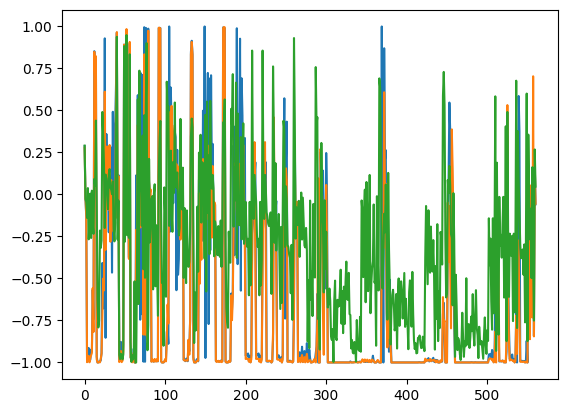

In [12]:
pd.Series(X_train[0].flatten()).plot()
pd.Series(X_train[1].flatten()).plot()
pd.Series(X_train[100].flatten()).plot()

In [41]:
y_train[1], y_train[2], y_train[5000]

(array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [52]:
X_train.shape

(7352, 561, 1)

### 2. Постройте базовую CNN модель.

In [13]:
!pip install tqdm

You should consider upgrading via the '/Users/technogleb/ts_nov_2024/env/bin/python -m pip install --upgrade pip' command.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import Callback
from tqdm.notebook import tqdm

1. Задайте модель Sequential
2. Добавьте входной сверточный слой Conv1D (укажите нужный input_shape)
3. Добавьте слой Flatten, чтобы можно было передать выход со сверточного слоя на вход полносвязному
4. Добавьте полносвязный слой с софтмаксом
5. Соберите модель, в качестве метода оптимизации укажите adam, в качестве функции потерь категориальную кроссэнтропию.
6. Обучите модель
7. Сделайте прогноз и выведите classification_report

In [18]:
# your code here
model = Sequential()
model.add(Conv1D(64, 20, activation='relu', input_shape=(561, 1)))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')

/Users/technogleb/ts_nov_2024/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# your code here
EPOCHS = 100
model.fit(X_train, y_train, epochs=EPOCHS, verbose=1)

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5680
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1040
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0702
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0436
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0330
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0341
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0273
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0233
Epoch 9/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0235
Epoch 10/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0329
Epoch 11/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0204
Epoch 12/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0155
Epoch 13/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0142
Epoch 14/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 15/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 1

In [21]:
from sklearn.metrics import classification_report

pred = model.predict(X_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       496
           1       0.96      0.98      0.97       471
           2       0.99      0.95      0.97       420
           3       0.98      0.91      0.94       491
           4       0.92      0.99      0.95       532
           5       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



### 3. Попробуйте добавить дополнительный свероточный слой, MaxPooling, и пару промежуточных полносвязный слоев. 

In [26]:
# your code here

In [27]:
# your code here

In [28]:

# your code here

### 4. Попробуйте сравнить качество с базовым dtw, используя fastdtw.

In [25]:
import fastdtw
fastdtw.fastdtw

<function fastdtw._fastdtw.fastdtw>

#### Напишите функцию get_label, возвращающую соответсвующий класс для ряда из X_test
* принимает на вход ряд из X_test
* проходится по всем рядам из X_train
* считает dtw
* возвращает y из y_train, соответвующий минимальному dtw

In [27]:
def get_label(ts_test: np.array) -> np.array:
    # your code here
    for ts_ref, y_ref in zip(X_train, y_train):
        min_dtw = np.inf
        min_y = None
        dtw, _ = fastdtw.fastdtw(ts_test.flatten(), ts_ref.flatten())
        if dtw < min_dtw:
            min_dtw = dtw
            min_y = y_ref
    return min_y

#### Пройдитесь по 50-100 рядам из X_test (примерное время 5-15 минут) и оцените точность классификации

In [34]:
# your code here
from tqdm.notebook import tqdm

y_pred = []
y_true = []

for _ in tqdm(range(50)):
    i = np.random.choice(list(range(len(X_test))))
    ts_test = X_test[i]
    y_pred.append(get_label(ts_test))
    y_true.append(y_test[i])

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
Rocket classifer

In [38]:
print(classification_report(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.14      1.00      0.25         7
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        10

    accuracy                           0.14        50
   macro avg       0.02      0.17      0.04        50
weighted avg       0.02      0.14      0.03        50



/Users/technogleb/ts_nov_2024/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/technogleb/ts_nov_2024/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/technogleb/ts_nov_2024/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [39]:
y_pred

[array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0.]),
 array([0., 1.